In [ ]:
%matplotlib inline

import neurolab as nl
import numpy as np
import matplotlib.pylab as pl

pl.style.use('ggplot')

In [1]:
n = 50

x = np.random.uniform(0, 5, (n, 2))
xtrain = np.random.uniform(0, 5, (n, 2))
#np.array([[3., 1.], [4., 2.], [2., 1.], [3., 3.], [4., 4.], [1., 1.], [2., 2.], [3., 1.], [0.5, 2.], [0.5, 4], [0.5, 3], [2., 4.], [3., 4.5], [2., 4.5], [1., 4.5]])

d = np.zeros(2*n).reshape(n, 2)

for i in range(n):
    if (xtrain[i, 1] - xtrain[i, 0] > 1):
        d[i, 1] = 1
        if (xtrain[i, 1] + xtrain[i, 0] > 5):
            d[i, 0] = 1
        else:
            d[i, 0] = -1
    else:
        d[i, 1] = -1
        if (xtrain[i, 1] + xtrain[i, 0] > 5):
            d[i, 0] = 1
        else:
            d[i, 0] = -1
            
pl.subplot(211)
pl.plot([0., 5.], [5., 0.], 'brown')
pl.plot([0., 4.], [1., 5.], 'brown')
pl.ylabel("Train data")
pl.plot(xtrain[:,0], xtrain[:,1], 'b*')
pl.subplot(212)
pl.plot([0., 5.], [5., 0.], 'brown')
pl.plot([0., 4.], [1., 5.], 'brown')
pl.ylabel("Generated data")
pl.plot(x[:,0], x[:,1], 'b+')
pl.show()

NameError: name 'np' is not defined

Epoch: 100; Error: 16.0;
The goal of learning is reached


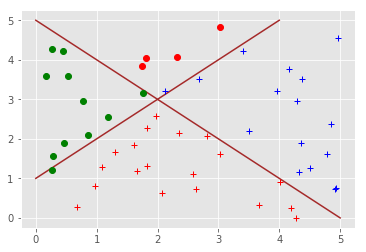

In [17]:
net = nl.net.newp([[0., 5.], [0., 5.]], 2, nl.net.trans.HardLims())

err = net.train(xtrain, d.reshape(n, 2), epochs=1000, show=100, goal=0.002)

out = net.sim(x)

pl.plot([0., 5.], [5., 0.], 'brown')
pl.plot([0., 4.], [1., 5.], 'brown')

for i in range(n):
    if out[i, 0] == 1 and out[i, 1] == 1:
        pl.plot(x[i,0], x[i,1], 'ro')
    elif out[i, 0] == -1 and out[i, 1] == 1:
        pl.plot(x[i,0], x[i,1], 'go')
    elif out[i, 0] == 1 and out[i, 1] == -1:
        pl.plot(x[i,0], x[i,1], 'b+')
    elif out[i, 0] == -1 and out[i, 1] == -1:
        pl.plot(x[i,0], x[i,1], 'r+')
        
pl.show()